# IMPORTS

In [1]:
import re
import nltk
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from bs4 import BeautifulSoup

In [3]:
%matplotlib inline

# Exercise 1

Search the Web for “spoof newspaper headlines,” to find such gems as: British
Left Waffles on Falkland Islands, and Juvenile Court to Try Shooting Defendant.
Manually tag these headlines to see whether knowledge of the part-of-speech tags
removes the ambiguity.

In [6]:
headline1 = nltk.word_tokenize('British Left Waffles on Falkland Islands')
nltk.pos_tag(headline1)

[('British', 'JJ'),
 ('Left', 'NNP'),
 ('Waffles', 'NNP'),
 ('on', 'IN'),
 ('Falkland', 'NNP'),
 ('Islands', 'NNP')]

In [7]:
headline2 = nltk.word_tokenize('Juvenile Court to Try Shooting Defendant')
nltk.pos_tag(headline2)

[('Juvenile', 'NNP'),
 ('Court', 'NNP'),
 ('to', 'TO'),
 ('Try', 'VB'),
 ('Shooting', 'NNP'),
 ('Defendant', 'NNP')]

# Exercise 2

Working with someone else, take turns picking a word that can be either a noun
or a verb (e.g., contest); the opponent has to predict which one is likely to be the
most frequent in the Brown Corpus. Check the opponent’s prediction, and tally
the score over several turns.

In [13]:
from nltk.corpus import brown
from nltk.probability import ConditionalFreqDist

In [14]:
cfd = ConditionalFreqDist(
    (word.lower(), tag) 
    for (word, tag) in brown.tagged_words(tagset='universal')
)

In [18]:
cfd['contest'].max()

'NOUN'

In [19]:
cfd['test'].max()

'NOUN'

In [22]:
cfd['work'].max()

'NOUN'

# Exercise 3

Tokenize and tag the following sentence: They wind back the clock, while we
chase after the wind. What different pronunciations and parts-of-speech are
involved?

In [26]:
sent = nltk.word_tokenize('They wind back the clock, while we chase after the wind')

In [28]:
nltk.pos_tag(sent, tagset='universal')

[('They', 'PRON'),
 ('wind', 'VERB'),
 ('back', 'ADV'),
 ('the', 'DET'),
 ('clock', 'NOUN'),
 (',', '.'),
 ('while', 'ADP'),
 ('we', 'PRON'),
 ('chase', 'VERB'),
 ('after', 'ADP'),
 ('the', 'DET'),
 ('wind', 'NOUN')]

According to https://dictionary.cambridge.org/dictionary/english/wind

wind [waɪnd] - verb, to turn or cause something to turn

wind [wɪnd] - noun, a current of air moving approximately horizontally, especially one strong enough to be felt

# Exercise 4

Review the mappings in Table 5-4. Discuss any other examples of mappings you
can think of. What type of information do they map from and to?

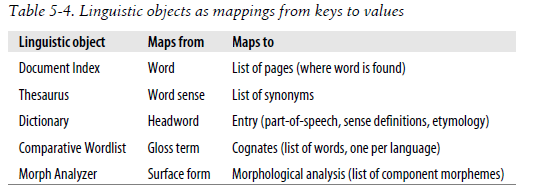

Pronunciation dictionary maps a word to its pronunciation

Sentiment dictionary maps a word to its sentiment value

# Exercise 5

Using the Python interpreter in interactive mode, experiment with the dictionary
examples in this chapter. Create a dictionary d, and add some entries. What happens
whether you try to access a non-existent entry, e.g., d['xyz']?

In [37]:
d = {}
d['a'] = 1
d['b'] = 2
d['xyz']

KeyError: 'xyz'

# Exercise 6

Try deleting an element from a dictionary d, using the syntax del d['abc']. Check
that the item was deleted.

In [39]:
del d['b']
d['b']

KeyError: 'b'

# Exercise 7

Create two dictionaries, d1 and d2, and add some entries to each. Now issue the
command d1.update(d2). What did this do? What might it be useful for?

In [44]:
d1 = {'a': 1, 'b': 2}
d2 = {'a': 1.1, 'c': 3}

In [48]:
d1.update(d2)  # .update method adds new key-value pairs as well as updates existing ones
d1

{'a': 1.1, 'b': 2, 'c': 3}

# Exercise 8

Create a dictionary e, to represent a single lexical entry for some word of your
choice. Define keys such as headword, part-of-speech, sense, and example, and assign
them suitable values.

In [49]:
e = {
    'successful': {
        'headword': 'success',
        'part-of-speech': 'ADJ',
        'sense': 'accomplishing an aim or purpose',
        'example': 'a successful attack on the town'
    }
}

In [50]:
e['successful']['sense']

'accomplishing an aim or purpose'

# Exercise 9

Satisfy yourself that there are restrictions on the distribution of go and went, in
the sense that they cannot be freely interchanged in the kinds of contexts illustrated
in (3), Section 5.7.

a. Go away!
b. He sometimes goes to the cafe.
c. All the cakes have gone.
d. We went on the excursion.

In [59]:
from nltk.corpus import brown

In [60]:
brown_text = nltk.Text(brown.words())

In [65]:
brown_text.concordance('go')

Displaying 25 of 626 matches:
struction bonds . The bond issue will go to the state courts for a friendly te
ress text still had `` quite a way to go '' toward completion . Decisions are 
 replied , `` I would say it's got to go thru several more drafts '' . Salinge
ause the levy is already scheduled to go up by 1 per cent on that date to pay 
irst year , 1963 . Both figures would go higher in later years . Other parts o
lion dollars the first year and would go up to 21 millions by 1966 . The Presi
said yesterday he would be willing to go before the city council `` or anyone 
red would know what to do or where to go in the event of an enemy attack . The
e another . Riverside residents would go to the Seekonk assembly point . Mr. H
nk E. Smith as the one most likely to go , the redistricting battle will put t
e battle . Then he could tell them to go home , while the administration conti
pinion as to how far the board should go , and whose advice it should follow .
n to where the parents

In [66]:
brown_text.concordance('went')

Displaying 25 of 507 matches:
ade good his promise . `` Everything went real smooth '' , the sheriff said . 
axation . Under committee rules , it went automatically to a subcommittee for 
e . And after several correspondents went into Pathet Lao territory and expose
the Kansas City scoring in the sixth went like this : Lumpe worked a walk as t
his season to 13 straight before one went astray last Saturday night in the 41
nd caught one pass for 13 yards . He went into the Army in March , 1957 , and 
m Monday , ran for 30 minutes , then went in , while the reserves scrimmaged f
tchie of the Ogden Standard Examiner went to his compartment to talk with him 
pped into his second shot . The ball went off in a majestic arc , an out-of-bo
 rare sense of humor . Everywhere he went in town , people sidled up , gave hi
e is where a man was born , reared , went to school and , most particularly , 
 off for good behavior . He promptly went to communist East Germany . The magi
in the Skipjack . With

# Exercise 10

Train a unigram tagger and run it on some new text. Observe that some words
are not assigned a tag. Why not?

In [74]:
from nltk.corpus import brown
from nltk.tag import UnigramTagger

In [75]:
unigram_tagger = UnigramTagger(brown.tagged_sents())

In [76]:
unigram_tagger.tag(['Train', 'a', 'unigram', 'tagger', 'and',
                    'run', 'it', 'on', 'some', 'new', 'text'])

[('Train', 'NN-TL'),
 ('a', 'AT'),
 ('unigram', None),
 ('tagger', None),
 ('and', 'CC'),
 ('run', 'VB'),
 ('it', 'PPS'),
 ('on', 'IN'),
 ('some', 'DTI'),
 ('new', 'JJ'),
 ('text', 'NN')]

Because the unigram_tagger didn't see such words as 'unigram' and 'tagger' during training. And there was not any backoff tagger.

# Exercise 11

Learn about the affix tagger (type help(nltk.AffixTagger)). Train an affix tagger
and run it on some new text. Experiment with different settings for the affix length
and the minimum word length. Discuss your findings.

In [21]:
from nltk.tag import AffixTagger
from nltk.corpus import brown

In [22]:
sent = nltk.word_tokenize('They wind back the clock, while we chase after the wind')

In [23]:
affix_tagger = AffixTagger(brown.tagged_sents(tagset='universal'))
print(affix_tagger.tag(sent))

[('They', None), ('wind', None), ('back', None), ('the', None), ('clock', 'NOUN'), (',', None), ('while', 'ADP'), ('we', None), ('chase', 'NOUN'), ('after', 'NOUN'), ('the', None), ('wind', None)]


In [24]:
affix_tagger = AffixTagger(
    train=brown.tagged_sents(tagset='universal'),
    affix_length=-2,
    min_stem_length=1
)
print(affix_tagger.tag(sent))

[('They', 'PRON'), ('wind', 'CONJ'), ('back', 'NOUN'), ('the', 'DET'), ('clock', 'NOUN'), (',', None), ('while', 'ADJ'), ('we', None), ('chase', 'NOUN'), ('after', 'NOUN'), ('the', 'DET'), ('wind', 'CONJ')]


AffixTagger shows bad performance in tagging short and long words. There is a trade-off between affix_length and min_stem_length.

# Exercise 12

Train a bigram tagger with no backoff tagger, and run it on some of the training
data. Next, run it on some new data. What happens to the performance of the
tagger? Why?

In [64]:
from nltk.tag import BigramTagger
from nltk.corpus import brown

In [65]:
tagged_sents = list(brown.tagged_sents(tagset='universal'))

In [66]:
np.random.seed(42)
np.random.shuffle(tagged_sents)

In [67]:
train_ind = int(len(tagged_sents) * 0.8)

In [68]:
train_sents = tagged_sents[:train_ind]
test_sents = tagged_sents[train_ind:]

In [69]:
bigram_tagger = BigramTagger(train_sents)

In [70]:
bigram_tagger.evaluate(train_sents)

0.9001371097863057

In [71]:
bigram_tagger.evaluate(test_sents)

0.4504860510722645

Bigram tagger manages to tag every word in a sentence it saw during
training, but does badly on an unseen sentence. As soon as it encounters a new word, it is unable to assign a tag. 
It cannot tag some word,
even if it was seen during training, simply because it never saw it during training with
a None tag on the previous word. Consequently, the tagger fails to tag the rest of the
sentence. Its overall accuracy score is very low.

# Exercise 13

We can use a dictionary to specify the values to be substituted into a formatting
string. Read Python’s library documentation for formatting strings (http://docs.python.org/lib/typesseq-strings.html) and use this method to display today’s date in
two different formats.

In [32]:
from datetime import datetime

In [33]:
today = datetime.today()

In [34]:
print('{:%Y-%m-%d %H:%M}'.format(today))

2019-07-29 13:33


In [35]:
print('{:%m-%d-%Y %H:%M:%S.%f}'.format(today))

07-29-2019 13:33:30.051372


# Exercise 14

Use sorted() and set() to get a sorted list of tags used in the Brown Corpus,
removing duplicates.

In [36]:
from nltk.corpus import brown

In [39]:
sorted(set(tag for word, tag in brown.tagged_words()))

["'",
 "''",
 '(',
 '(-HL',
 ')',
 ')-HL',
 '*',
 '*-HL',
 '*-NC',
 '*-TL',
 ',',
 ',-HL',
 ',-NC',
 ',-TL',
 '--',
 '---HL',
 '.',
 '.-HL',
 '.-NC',
 '.-TL',
 ':',
 ':-HL',
 ':-TL',
 'ABL',
 'ABN',
 'ABN-HL',
 'ABN-NC',
 'ABN-TL',
 'ABX',
 'AP',
 'AP$',
 'AP+AP-NC',
 'AP-HL',
 'AP-NC',
 'AP-TL',
 'AT',
 'AT-HL',
 'AT-NC',
 'AT-TL',
 'AT-TL-HL',
 'BE',
 'BE-HL',
 'BE-TL',
 'BED',
 'BED*',
 'BED-NC',
 'BEDZ',
 'BEDZ*',
 'BEDZ-HL',
 'BEDZ-NC',
 'BEG',
 'BEM',
 'BEM*',
 'BEM-NC',
 'BEN',
 'BEN-TL',
 'BER',
 'BER*',
 'BER*-NC',
 'BER-HL',
 'BER-NC',
 'BER-TL',
 'BEZ',
 'BEZ*',
 'BEZ-HL',
 'BEZ-NC',
 'BEZ-TL',
 'CC',
 'CC-HL',
 'CC-NC',
 'CC-TL',
 'CC-TL-HL',
 'CD',
 'CD$',
 'CD-HL',
 'CD-NC',
 'CD-TL',
 'CD-TL-HL',
 'CS',
 'CS-HL',
 'CS-NC',
 'CS-TL',
 'DO',
 'DO*',
 'DO*-HL',
 'DO+PPSS',
 'DO-HL',
 'DO-NC',
 'DO-TL',
 'DOD',
 'DOD*',
 'DOD*-TL',
 'DOD-NC',
 'DOZ',
 'DOZ*',
 'DOZ*-TL',
 'DOZ-HL',
 'DOZ-TL',
 'DT',
 'DT$',
 'DT+BEZ',
 'DT+BEZ-NC',
 'DT+MD',
 'DT-HL',
 'DT-NC',
 'DT-TL',
 'D

In [40]:
sorted(set(tag for word, tag in brown.tagged_words(tagset='universal')))

['.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X']

# Exercise 15

Write programs to process the Brown Corpus and find answers to the following
questions:<div>

In [76]:
from nltk.corpus import brown
from nltk.probability import ConditionalFreqDist, FreqDist

In [52]:
cfd = ConditionalFreqDist((word.lower(), tag) for word, tag in brown.tagged_words())

a. Which nouns are more common in their plural form, rather than their singular
form? (Only consider regular plurals, formed with the -s suffix.)

In [68]:
[word for word, fd in cfd.items() if fd['NNS'] > fd['NN']]

['irregularities',
 'presentments',
 'thanks',
 'reports',
 'voters',
 'laws',
 'legislators',
 'topics',
 'departments',
 'practices',
 'governments',
 'offices',
 'personnel',
 'policies',
 'steps',
 'funds',
 'services',
 'homes',
 'items',
 'counties',
 'jurors',
 'taxpayers',
 'appraisers',
 'guardians',
 'administrators',
 'fees',
 'wards',
 'procedures',
 'recommendations',
 'juries',
 'citizens',
 'actions',
 'costs',
 'servants',
 'criticisms',
 'influences',
 'concessionaires',
 'prices',
 'deputies',
 'matters',
 'officials',
 'employes',
 'farms',
 'attorneys',
 'responses',
 'petitions',
 'precincts',
 'signatures',
 'dissents',
 'says',
 'courses',
 'names',
 'candidates',
 'relations',
 'years',
 'starts',
 'areas',
 'adjustments',
 'chambers',
 '$100',
 'bonds',
 '$30',
 'courts',
 'sales',
 'contracts',
 'highways',
 '$3',
 '$4',
 'roads',
 'ones',
 'authorities',
 '$50',
 'plans',
 '$10',
 'allowances',
 'details',
 'raises',
 'sessions',
 'members',
 'congressmen',
 

b. Which word has the greatest number of distinct tags? What are they, and what
do they represent?

In [70]:
max_tag_number = max(len(fd) for word, fd in cfd.items())

In [71]:
[word for word, fd in cfd.items() if len(fd) == max_tag_number]

['that']

In [74]:
cfd['that'].most_common()

[('CS', 6464),
 ('DT', 2260),
 ('WPS', 1654),
 ('WPO', 135),
 ('QL', 56),
 ('DT-NC', 6),
 ('DT-TL', 5),
 ('WPS-TL', 3),
 ('WPS-NC', 3),
 ('CS-NC', 2),
 ('WPS-HL', 2),
 ('CS-HL', 1),
 ('DT-HL', 1),
 ('NIL', 1),
 ('WPO-NC', 1)]

CS = Subordinating conjunction<div> DT = singular determiner/quantifier<div> WPS = nominative wh- pronoun<div> WPO = objective wh- pronoun<div> QL = qualifier<div> ...

c. List tags in order of decreasing frequency. What do the 20 most frequent tags
represent?

In [77]:
fd = FreqDist(tag for word, tag in brown.tagged_words())

In [79]:
fd.most_common(20)

[('NN', 152470),
 ('IN', 120557),
 ('AT', 97959),
 ('JJ', 64028),
 ('.', 60638),
 (',', 58156),
 ('NNS', 55110),
 ('CC', 37718),
 ('RB', 36464),
 ('NP', 34476),
 ('VB', 33693),
 ('VBN', 29186),
 ('VBD', 26167),
 ('CS', 22143),
 ('PPS', 18253),
 ('VBG', 17893),
 ('PP$', 16872),
 ('TO', 14918),
 ('PPSS', 13802),
 ('CD', 13510)]

NN = singular or mass noun<div>
IN = preposition<div>
AT = article (a, the, no)<div>
JJ = adjective<div> 
...

d. Which tags are nouns most commonly found after? What do these tags
represent?

In [80]:
fd = FreqDist(
    t2 for (w1, t1), (w2, t2) 
    in nltk.bigrams(brown.tagged_words()) 
    if t1.startswith('N')
)

In [83]:
fd.most_common(10)

[('IN', 60188),
 (',', 34229),
 ('.', 32338),
 ('NN', 16824),
 ('CC', 16080),
 ('NP', 9661),
 ('VBD', 9229),
 ('NNS', 7662),
 ("''", 5008),
 ('MD', 4957)]

IN = preposition<div>
',' = comma<div>
'.' = sentence (. ; ? *)<div>
NN = singular or mass noun<div>
...

# Exercise 16

Explore the following issues that arise in connection with the lookup tagger:<div>
a. What happens to the tagger performance for the various model sizes when am
backoff tagger is omitted?<div>
b. Consider the curve in Figure 5-4; suggest a good size for a lookup tagger that
balances memory and performance. Can you come up with scenarios where it
would be preferable to minimize memory usage, or to maximize performance
with no regard for memory usage?